<a href="https://colab.research.google.com/github/SamarHamdy/Train.csv/blob/main/FinalProj_Samar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import missingno as msno
%matplotlib inline


In [2]:
filename='LoanExport.csv'
Loan_data= pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
type(Loan_data)

pandas.core.frame.DataFrame

In [5]:
print(Loan_data.shape)

(182073, 28)


In [6]:
print(Loan_data.columns)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [7]:
Loan_data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                   float64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm          float64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent        float64
MonthsDelinquent      float64
MonthsInRepayment     float64
dtype: object

Abbriviations:

MSA - Marketing Services Agreements

OCLTV - Combined loan-to-value

LTV - Loan to value

PPM - Private Placement Memorandum

MIP% - Mortgag Insurance Percentage / MIP- Mortgage Insurance Premium

OCLTV - Original Combined Loan to Value

DTI - Debt to Income ratio

OrigUPB - Original Unpaid principal balance

PPM - Prepayment Penalty Mortgage

In [8]:
Loan_data.describe()


,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,182073.000000,182073.000000,182073.000000,182073.000000,182073.000000,182073.000000,182073.000000,182073.000000,182072.000000,182072.000000,182072.000000,182072.000000,182072.000000,182072.000000
mean,676.472832,199904.602110,202902.440845,11.011682,1.024754,79.648147,31.526629,125521.814986,79.625829,6.954752,359.864828,0.256904,2.673113,60.452711
std,67.034037,12.061312,15.467679,13.105525,0.194494,13.532233,12.856458,52910.008268,13.523230,0.351685,2.025124,0.436927,10.684936,46.333597
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,1420.000000,0.000000,4.750000,301.000000,0.000000,0.000000,1.000000
25%,655.000000,199903.000000,202902.000000,0.000000,1.000000,75.000000,24.000000,84000.000000,75.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,687.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,33.000000,118000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,712.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,40.000000,160000.000000,90.000000,7.125000,360.000000,1.000000,1.000000,63.000000
max,735.000000,201303.000000,204302.000000,52.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [9]:
Loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360.0,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,52.0
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360.0,1,FT,CHASEHOMEFINANCELLC,0.0,0.0,144.0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360.0,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,67.0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360.0,2,GM,GMACMTGECORP,0.0,0.0,35.0
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360.0,2,GM,GMACMTGECORP,0.0,0.0,54.0


**Borrower Financial Information:** Credit Score, First_Time_Homebuyer_Flag, original debt-to-income (DTI) ratio, number of borrowers, occupancy status (primary residence, investment or second home)

**Loan Information:** First_Payment (date), Maturity_Date, MI_pert (% mortgage insured), original LTV (loan-to-value) ratio, original combined LTV ratio, original interest rate, original unpaid balance, PPM (prepayment penalty mortgage) flag, loan purpose (purchase vs refinance), original loan term, super-conforming flag

**Property information:** number of units, property type (condo, single-family home, etc.)

**Location:** MSA_Code (Metropolitan statistical area), Property_state, postal_code

**Seller/Servicer information:** channel (retail, broker, etc.), seller name, servicer name

In [10]:
Loan_data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
182068,735,199905,N,202904,42044,25,1,O,90,48,...,92600,F199Q1066004,P,360.0,1,FL,CHASEMANHATTANMTGECO,0.0,0.0,46.0
182069,735,199905,N,202904,42044,30,1,O,95,38,...,92800,F199Q1168593,P,360.0,2,BA,BANKOFAMERICANA,0.0,0.0,45.0
182070,735,199905,N,202904,42100,0,1,O,80,44,...,95000,F199Q1352987,P,360.0,1,BI,WASHINGTONMUTUALBANK,0.0,0.0,46.0
182071,735,199905,N,202904,42140,0,1,O,80,27,...,87500,F199Q1261586,P,360.0,2,FI,CITIMORTGAGEINC,0.0,0.0,41.0
182072,735,199905,N,202904,42220,0,1,O,72,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Unit** refres to number of properties morrtgage

**Occupancy** values refer to O:owner ,Occupaied ,I:investment Peoperty ,S:secondary home

**Channel** values refer to R:retail, B:broker, C:correspondent

Product Type value FRM:fixed rate mortgages

In [11]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182073 entries, 0 to 182072
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         182073 non-null  int64  
 1   FirstPaymentDate    182073 non-null  int64  
 2   FirstTimeHomebuyer  182073 non-null  object 
 3   MaturityDate        182073 non-null  int64  
 4   MSA                 182073 non-null  object 
 5   MIP                 182073 non-null  int64  
 6   Units               182073 non-null  int64  
 7   Occupancy           182073 non-null  object 
 8   OCLTV               182073 non-null  int64  
 9   DTI                 182073 non-null  int64  
 10  OrigUPB             182073 non-null  int64  
 11  LTV                 182072 non-null  float64
 12  OrigInterestRate    182072 non-null  float64
 13  Channel             182072 non-null  object 
 14  PPM                 182072 non-null  object 
 15  ProductType         182072 non-nul

In [12]:
#filter columns by dtype
Loan_data.select_dtypes(include=['float64']).columns

Index(['LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [13]:
Loan_data.select_dtypes(include=['object']).columns

Index(['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM',
       'ProductType', 'PropertyState', 'PropertyType', 'PostalCode',
       'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName',
       'ServicerName'],
      dtype='object')

In [14]:
Loan_data.select_dtypes(include=['int64']).columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB'],
      dtype='object')

In [15]:
# convert column that contain Date value to datetime 
Loan_data['FirstPaymentDate'] = pd.to_datetime(Loan_data['FirstPaymentDate'])

Loan_data['MaturityDate'] = pd.to_datetime(Loan_data['MaturityDate'])

In [16]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182073 entries, 0 to 182072
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         182073 non-null  int64         
 1   FirstPaymentDate    182073 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  182073 non-null  object        
 3   MaturityDate        182073 non-null  datetime64[ns]
 4   MSA                 182073 non-null  object        
 5   MIP                 182073 non-null  int64         
 6   Units               182073 non-null  int64         
 7   Occupancy           182073 non-null  object        
 8   OCLTV               182073 non-null  int64         
 9   DTI                 182073 non-null  int64         
 10  OrigUPB             182073 non-null  int64         
 11  LTV                 182072 non-null  float64       
 12  OrigInterestRate    182072 non-null  float64       
 13  Channel             182072 no

Processing Data

In [17]:
Loan_data.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.063005,-0.003382,-0.055503,0.000645,0.036941,-0.055746,-0.082089,0.009113,-0.129192,-0.100312,-0.030504
MIP,-0.063005,1.000000,-0.049614,0.736931,0.076758,0.008192,0.738191,0.112735,0.011515,0.028782,0.031601,-0.089160
Units,-0.003382,-0.049614,1.000000,-0.064090,0.006588,0.038557,-0.063935,0.068624,0.004382,0.008217,-0.005341,0.023123
OCLTV,-0.055503,0.736931,-0.064090,1.000000,0.077244,0.076624,0.999343,0.083708,0.015869,0.030347,0.040154,-0.089324
DTI,0.000645,0.076758,0.006588,0.077244,1.000000,0.064941,0.076742,0.079211,0.031988,0.035782,0.025418,-0.005220
OrigUPB,0.036941,0.008192,0.038557,0.076624,0.064941,1.000000,0.076021,-0.134474,-0.003871,-0.082473,-0.081507,-0.206782
LTV,-0.055746,0.738191,-0.063935,0.999343,0.076742,0.076021,1.000000,0.084038,0.015774,0.030594,0.040294,-0.089598
OrigInterestRate,-0.082089,0.112735,0.068624,0.083708,0.079211,-0.134474,0.084038,1.000000,-0.005953,0.051858,0.045404,-0.106685
OrigLoanTerm,0.009113,0.011515,0.004382,0.015869,0.031988,-0.003871,0.015774,-0.005953,1.000000,0.006317,0.005462,0.014688
EverDelinquent,-0.129192,0.028782,0.008217,0.030347,0.035782,-0.082473,0.030594,0.051858,0.006317,1.000000,0.425484,0.264009


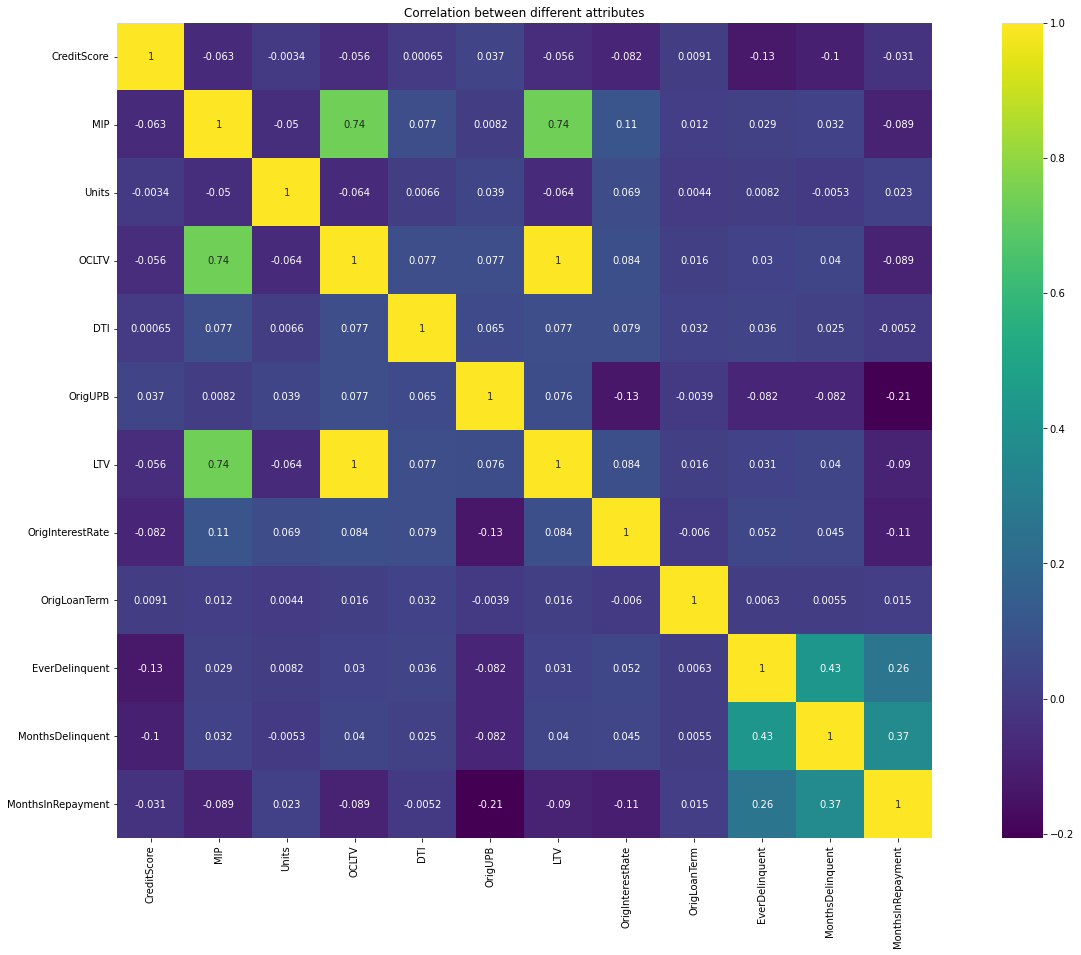

In [36]:
plt.figure(figsize=(25,15))
sns.heatmap(Loan_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [18]:
#count/find null values
missing_values= Loan_data.isnull().sum()
missing_values

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       1
OrigInterestRate          1
Channel                   1
PPM                       1
ProductType               1
PropertyState             1
PropertyType              1
PostalCode                1
LoanSeqNum                1
LoanPurpose               1
OrigLoanTerm              1
NumBorrowers              1
SellerName            15552
ServicerName              1
EverDelinquent            1
MonthsDelinquent          1
MonthsInRepayment         1
dtype: int64

In [19]:
#total missing values
total_missing_values= missing_values.sum()
print("total missing values= ", total_missing_values)

#count total cells
total_cells = np.product(Loan_data.shape)
print("total number of cells= ", total_cells)

#percentage of total missing values
total_missing_values_percentage= (total_missing_values/total_cells)*100
print("percent of total missing values= %" ,total_missing_values_percentage)

total missing values=  15568
total number of cells=  5098044
percent of total missing values= % 0.30537202111241096


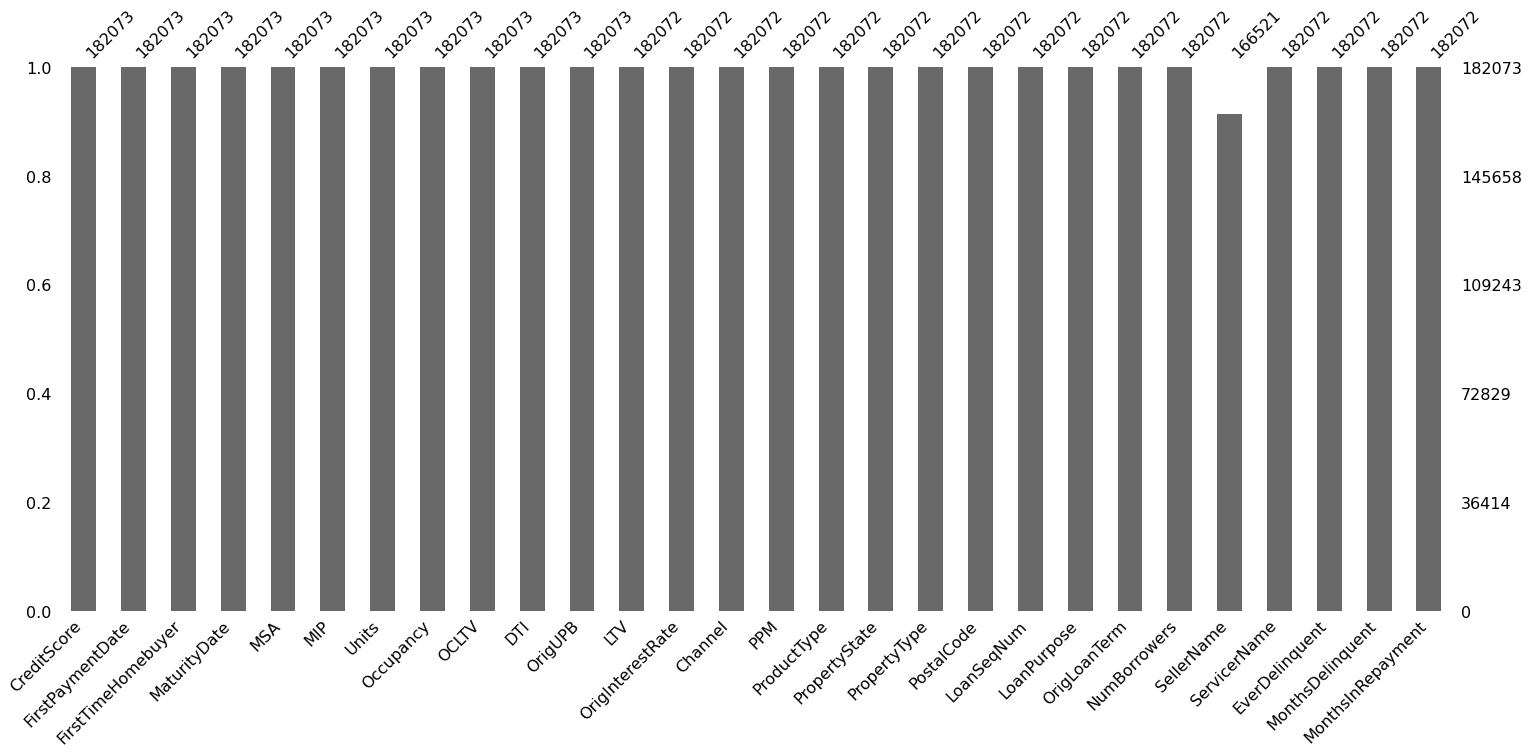

In [20]:
#bar plot showing where is missing values
msno.bar(Loan_data)

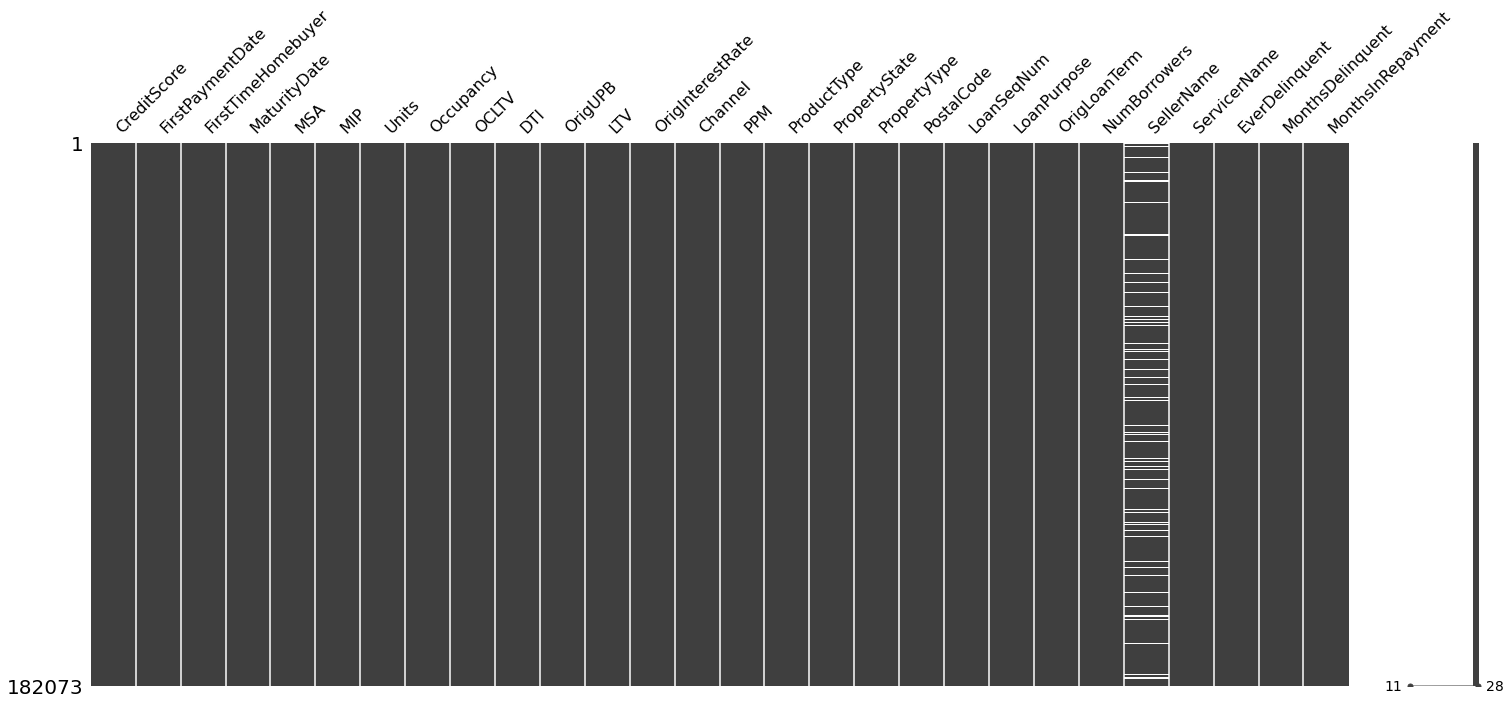

In [21]:
#plot shows position of missing values
msno.matrix(Loan_data)

In [23]:
# filling null values . 
Loan_data ["SellerName"].fillna("No Seller Name", inplace = True)

In [24]:
Loan_data['SellerName'].isnull().sum()

0

In [25]:
Loan_data['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [26]:
#X  refers to unknown , so replace it with the mode value the most repeated value.
Loan_data['FirstTimeHomebuyer'].mode()

0    N
dtype: object

In [34]:
Loan_data['FirstTimeHomebuyer'] = Loan_data['FirstTimeHomebuyer'].replace(['X'],'N')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


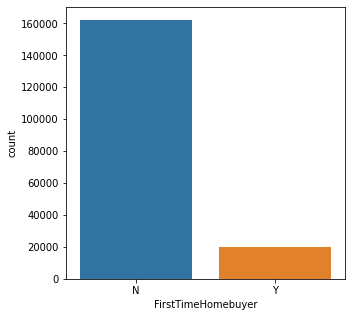

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(Loan_data.FirstTimeHomebuyer)

In [37]:
Loan_data['Occupancy'].unique()

array(['O', 'I', 'S'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


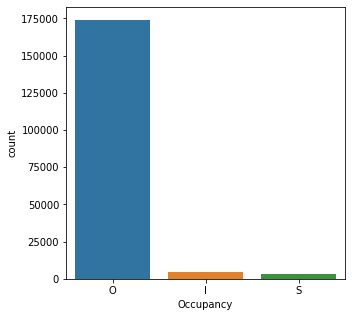

In [38]:
plt.figure(figsize=(5, 5))
sns.countplot(Loan_data.Occupancy)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


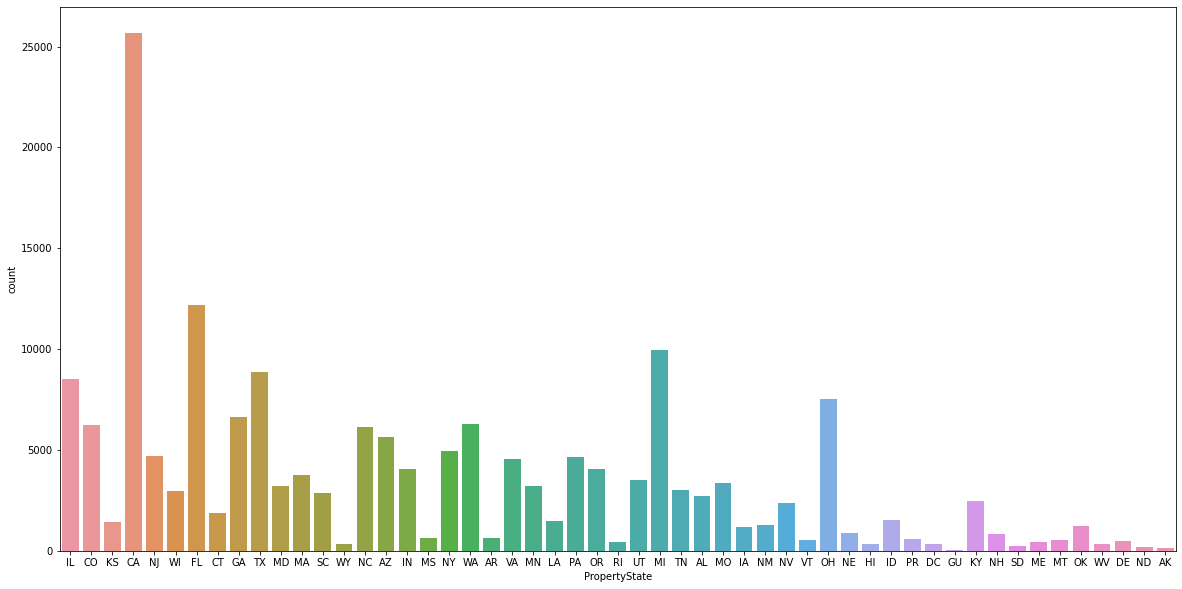

In [39]:
plt.figure(figsize=(20, 10))
sns.countplot(Loan_data.PropertyState)

In [40]:
Loan_data['Channel'].unique()

array(['T', 'R', 'C', 'B', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


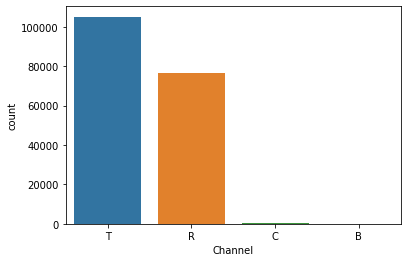

In [41]:
sns.countplot(Loan_data.Channel)

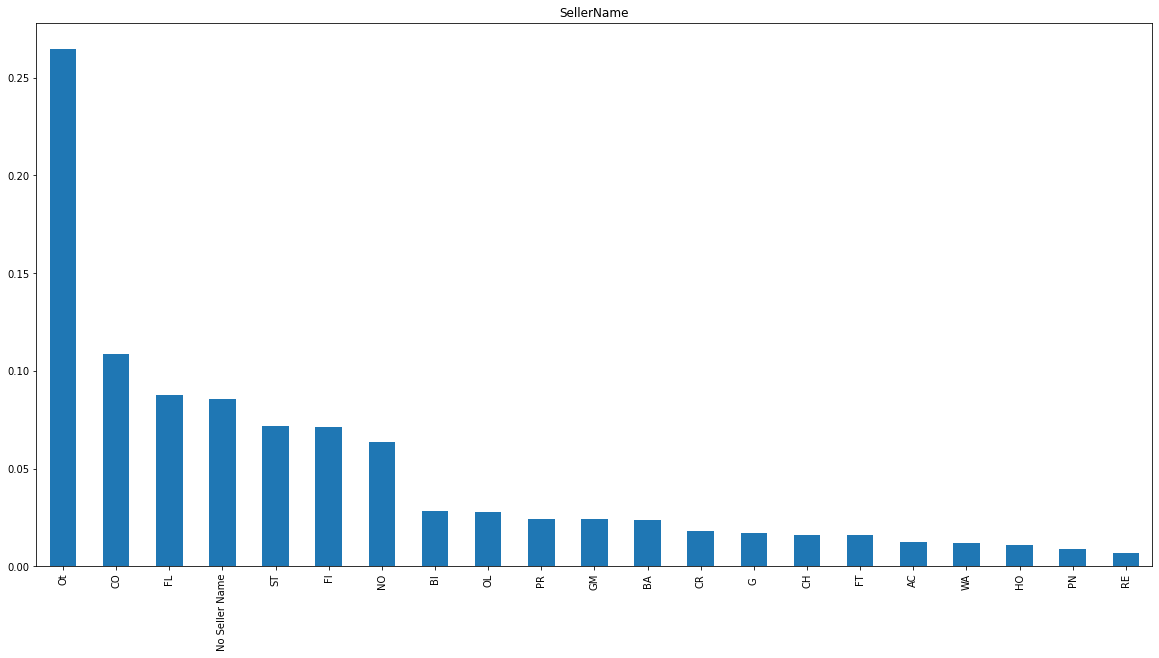

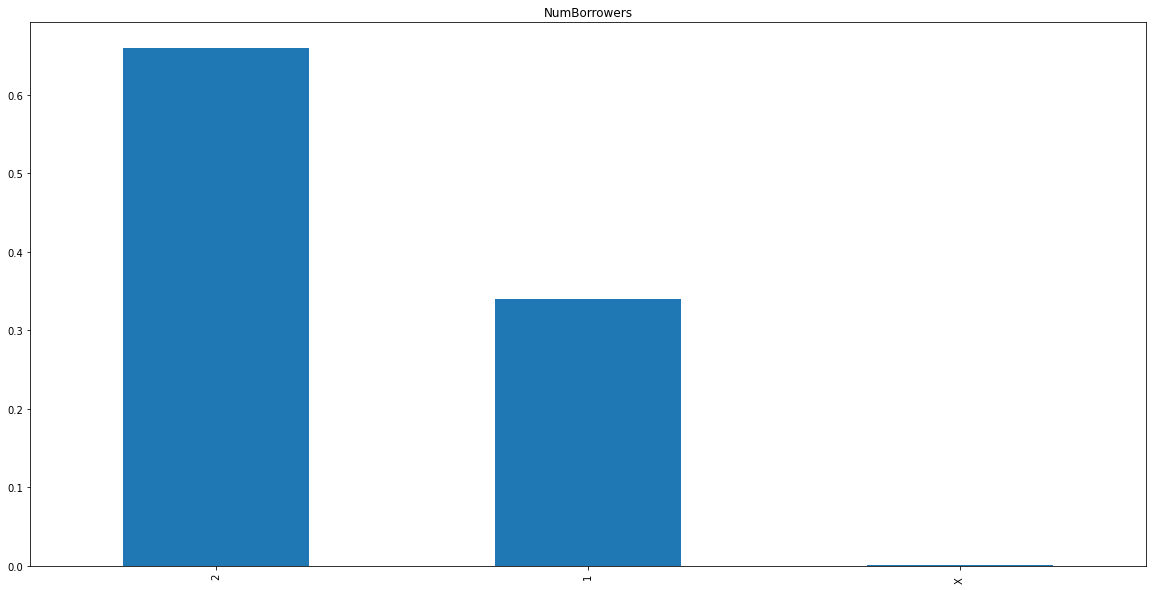

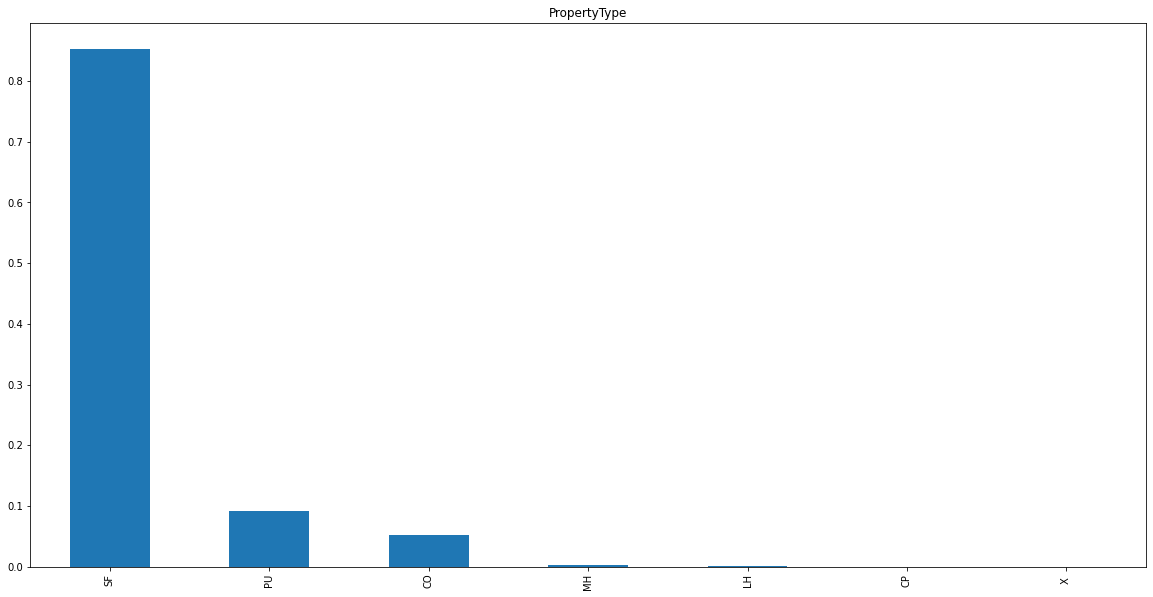

In [42]:
Loan_data['SellerName'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='SellerName')
plt.show()

Loan_data['NumBorrowers'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='NumBorrowers')
plt.show()

Loan_data['PropertyType'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='PropertyType')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


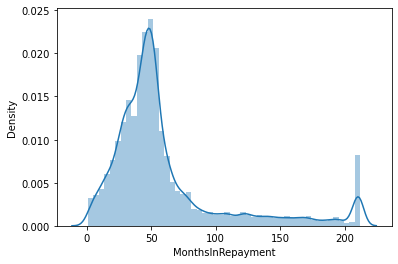

In [43]:
sns.distplot(Loan_data['MonthsInRepayment'])
plt.show()